# Inverstigating a dataset - No Show Appointments - kagglev2 , may/2016 

### Introductions :  

#### Questions we are trying to answer :  

- what is the overall appointment show-up vs. no show-up rate  
- what are the most feature that matter the most of ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient make it to his appiontment?

### importing the libraries that we gonna use in our inverstigation

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties:

In [67]:
# Load the data. 
# df = Data Frame. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Show summary of the data:

In [68]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Check null values

In [69]:
pd.isna(df).sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### _*There no null values_

### Show some of the data:

In [70]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Looking for Data need to be cleaned

In [71]:
df.info() 

# check if dplicates in the data 
print("Num of dublicated : ", + sum(df.duplicated()))

#check the age if it is '- number' or = 0
df[df["Age"] <= 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
Num of dublicated :  0


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No



### Data Cleaning!

##### Fixing typos in data columns


In [72]:
# rename = Rename function
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)


##### converting some columns that has date to a datetime datatype

In [73]:
# converting datatype to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])



#### fixing the ages column that <0 by taking the mean of all ages.

In [74]:
# we fix any age has 0 or less values because it's not make sense to have those values
# in the data (there is no patient has the exactly the age 0 or less)
mean_ages = df['Age'].mean()
df[df['Age'] <= 0] = mean_ages


### convert no show data to 0 and 1 instead of 'Yes' and 'No'

In [75]:
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

/Users/M.swaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/M.swaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
# create a mask for people who came
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed



<a id='eda'></a>
## Exploratory Data Analysis

### 1-  (what is the overall appointment show-up vs. no show-up rate?)

77.18204601590561


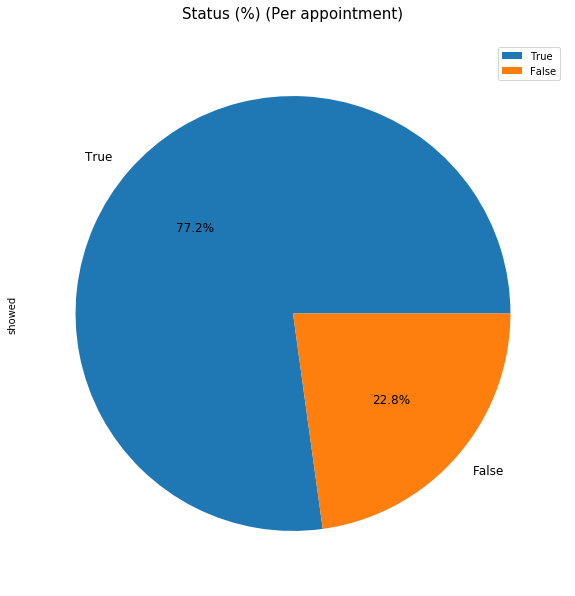

In [77]:
allP = df['showed'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();


### 2- (what are the most feature that matter the most of ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient make it to his appiontment?)

In [26]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,not_showed
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,False
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,True,False


#### print the average age of people who show up.

In [78]:
df.Age[showed].mean()

39.07518726482

#### print the average age of people not show up

In [79]:
df.Age[not_showed].mean()

35.329151291512915

###### histogram to show the realtion between the (age,alcoholic people, SMS recievers, Gender, Scholarship)  and the people who show up.

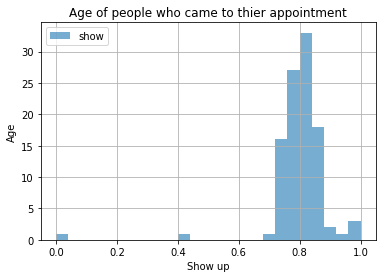

In [80]:
df.groupby('Age')['showed'].mean().hist(alpha=0.6,bins=25,label='show');
plt.xlabel("Show up")
plt.ylabel("Age")
plt.title("Age of people who came to thier appointment")
plt.legend()

Alcoholism
0.000000     0.797321
1.000000     0.798512
37.088874    0.000000
Name: showed, dtype: float64


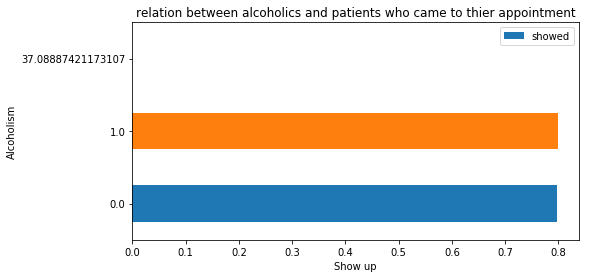

In [58]:
print(df.groupby('Alcoholism')['showed'].mean())
df.groupby('Alcoholism')['showed'].mean().plot(kind='barh',figsize=(8,4));
plt.xlabel("Show up")
plt.ylabel("Alcoholism")
plt.title("relation between alcoholics and patients who came to thier appointment")
plt.legend()

SMS_received
0.000000     0.832712
1.000000     0.723348
37.088874    0.000000
Name: showed, dtype: float64


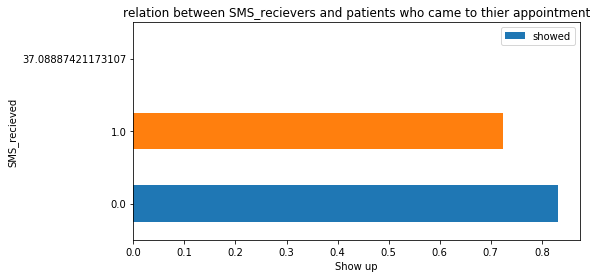

In [81]:
print(df.groupby('SMS_received')['showed'].mean())
df.groupby('SMS_received')['showed'].mean().plot(kind='barh',figsize=(8,4));
plt.xlabel("Show up")
plt.ylabel("SMS_recieved")
plt.title("relation between SMS_recievers and patients who came to thier appointment")
plt.legend()


Gender
37.08887421173107    0.000000
F                    0.796415
M                    0.799154
Name: showed, dtype: float64


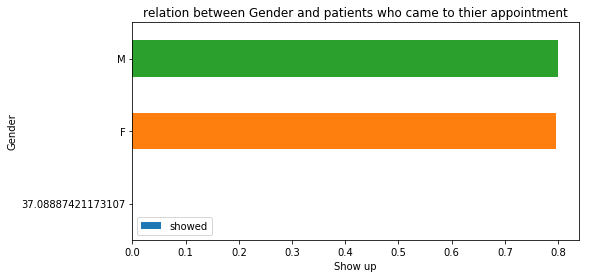

In [82]:
print(df.groupby('Gender')['showed'].mean())
df.groupby('Gender')['showed'].mean().plot(kind='barh',figsize=(8,4));
plt.xlabel("Show up")
plt.ylabel("Gender")
plt.title("relation between Gender and patients who came to thier appointment")
plt.legend()

###### completing the visualiztion to see what is the feature that affect patients to come.

Scholarship
0.000000     0.801316
1.000000     0.762143
37.088874    0.000000
Name: showed, dtype: float64


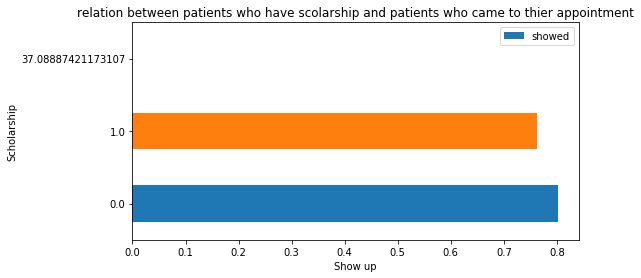

In [86]:
print(df.groupby('Scholarship')['showed'].mean())
df.groupby('Scholarship')['showed'].mean().plot(kind = 'barh',figsize=(8,4))
plt.xlabel("Show up")
plt.ylabel("Scholarship")
plt.title("relation between patients who have scolarship and patients who came to thier appointment")
plt.legend()

As we can see Age is the most factor that affect people who will attend or not!

<a id='conclusions'></a>
## Conclusions

#### what we noticed:

• Sending a text message is not necessary to confirm the patient's will presence. 

• The age is the most important factor that decides if a patient would come or not the average of age for people who will be most likely to show up is 39.07518726482 , and the average ages for people who are not show up is 35.329151291512915.  
  
• About 22.8% of people that schedule an appointment did not make it to thier appointment  

• Most of people who has Scholarship are not show up with a percentage of 76.2% of showing and patients who don't have a scholarship have the percentage 80.1%

  
_*No any relation between gender and alcoholic that decide if the person would come to his appointment or not!_
  

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1